In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 200)


In [3]:
df = pd.read_csv("CSV/bank-additional.csv",delimiter =";") #delimiter separates the columns on the basis of the ';' 
df.rename(columns={"y":"Deposit"},inplace= True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [5]:
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [6]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,175,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [7]:
df.shape

(4119, 21)

In [8]:
df.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'Deposit'],
      dtype='object')

In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
Deposit           0
dtype: int64

In [12]:
df.describe(include="object")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,Deposit
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


In [13]:
numerical=df.describe(exclude="object").columns

In [14]:
categorical=df.describe(include="object").columns

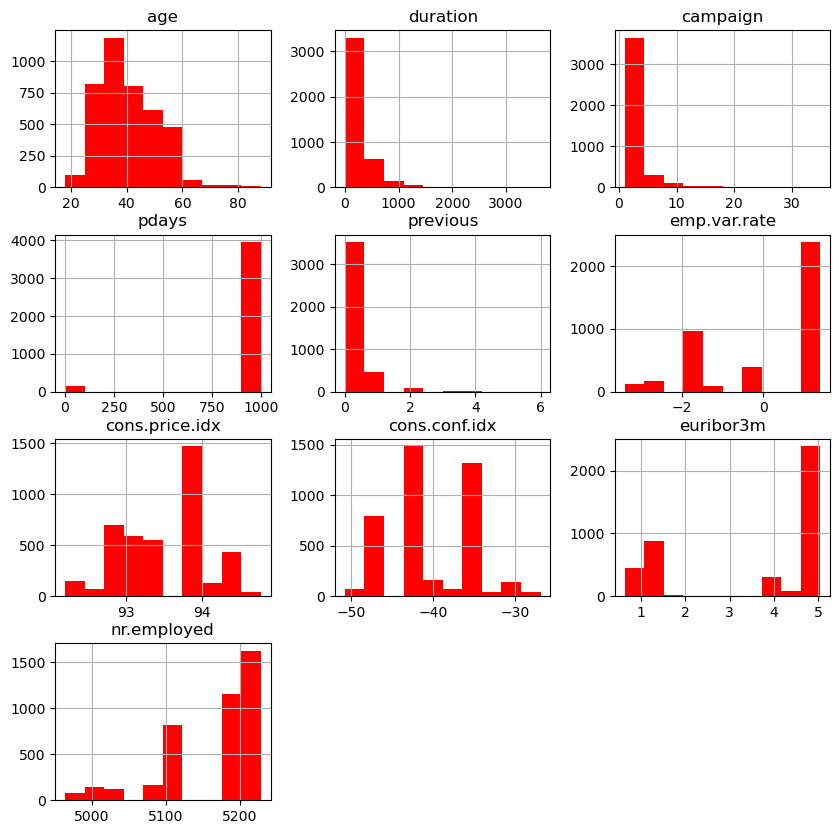

In [15]:
df.hist(figsize=(10,10),color='r')
plt.show()

In [16]:
# df.loc[~df.duplicated(subset=['emp.var.rate'])]
# df.query('`emp.var.rate` == -1.1')



In [17]:
# data= df.loc[~df.duplicated(subset=["education"])].reset_index(drop=True).copy() 

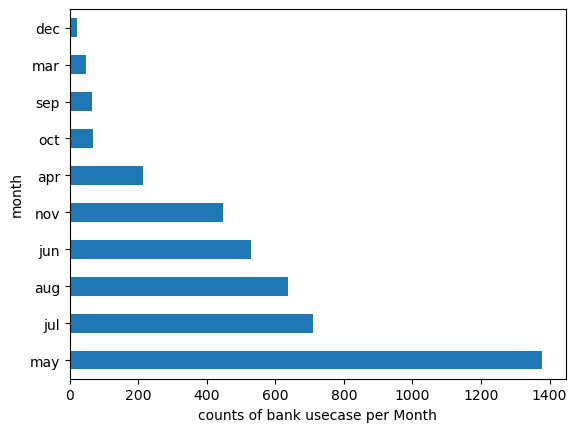

In [18]:
ax =df["month"].value_counts() \
    .head(10) \
    .plot(kind='barh',)
ax.set_xlabel("counts of bank usecase per Month")
plt.show()

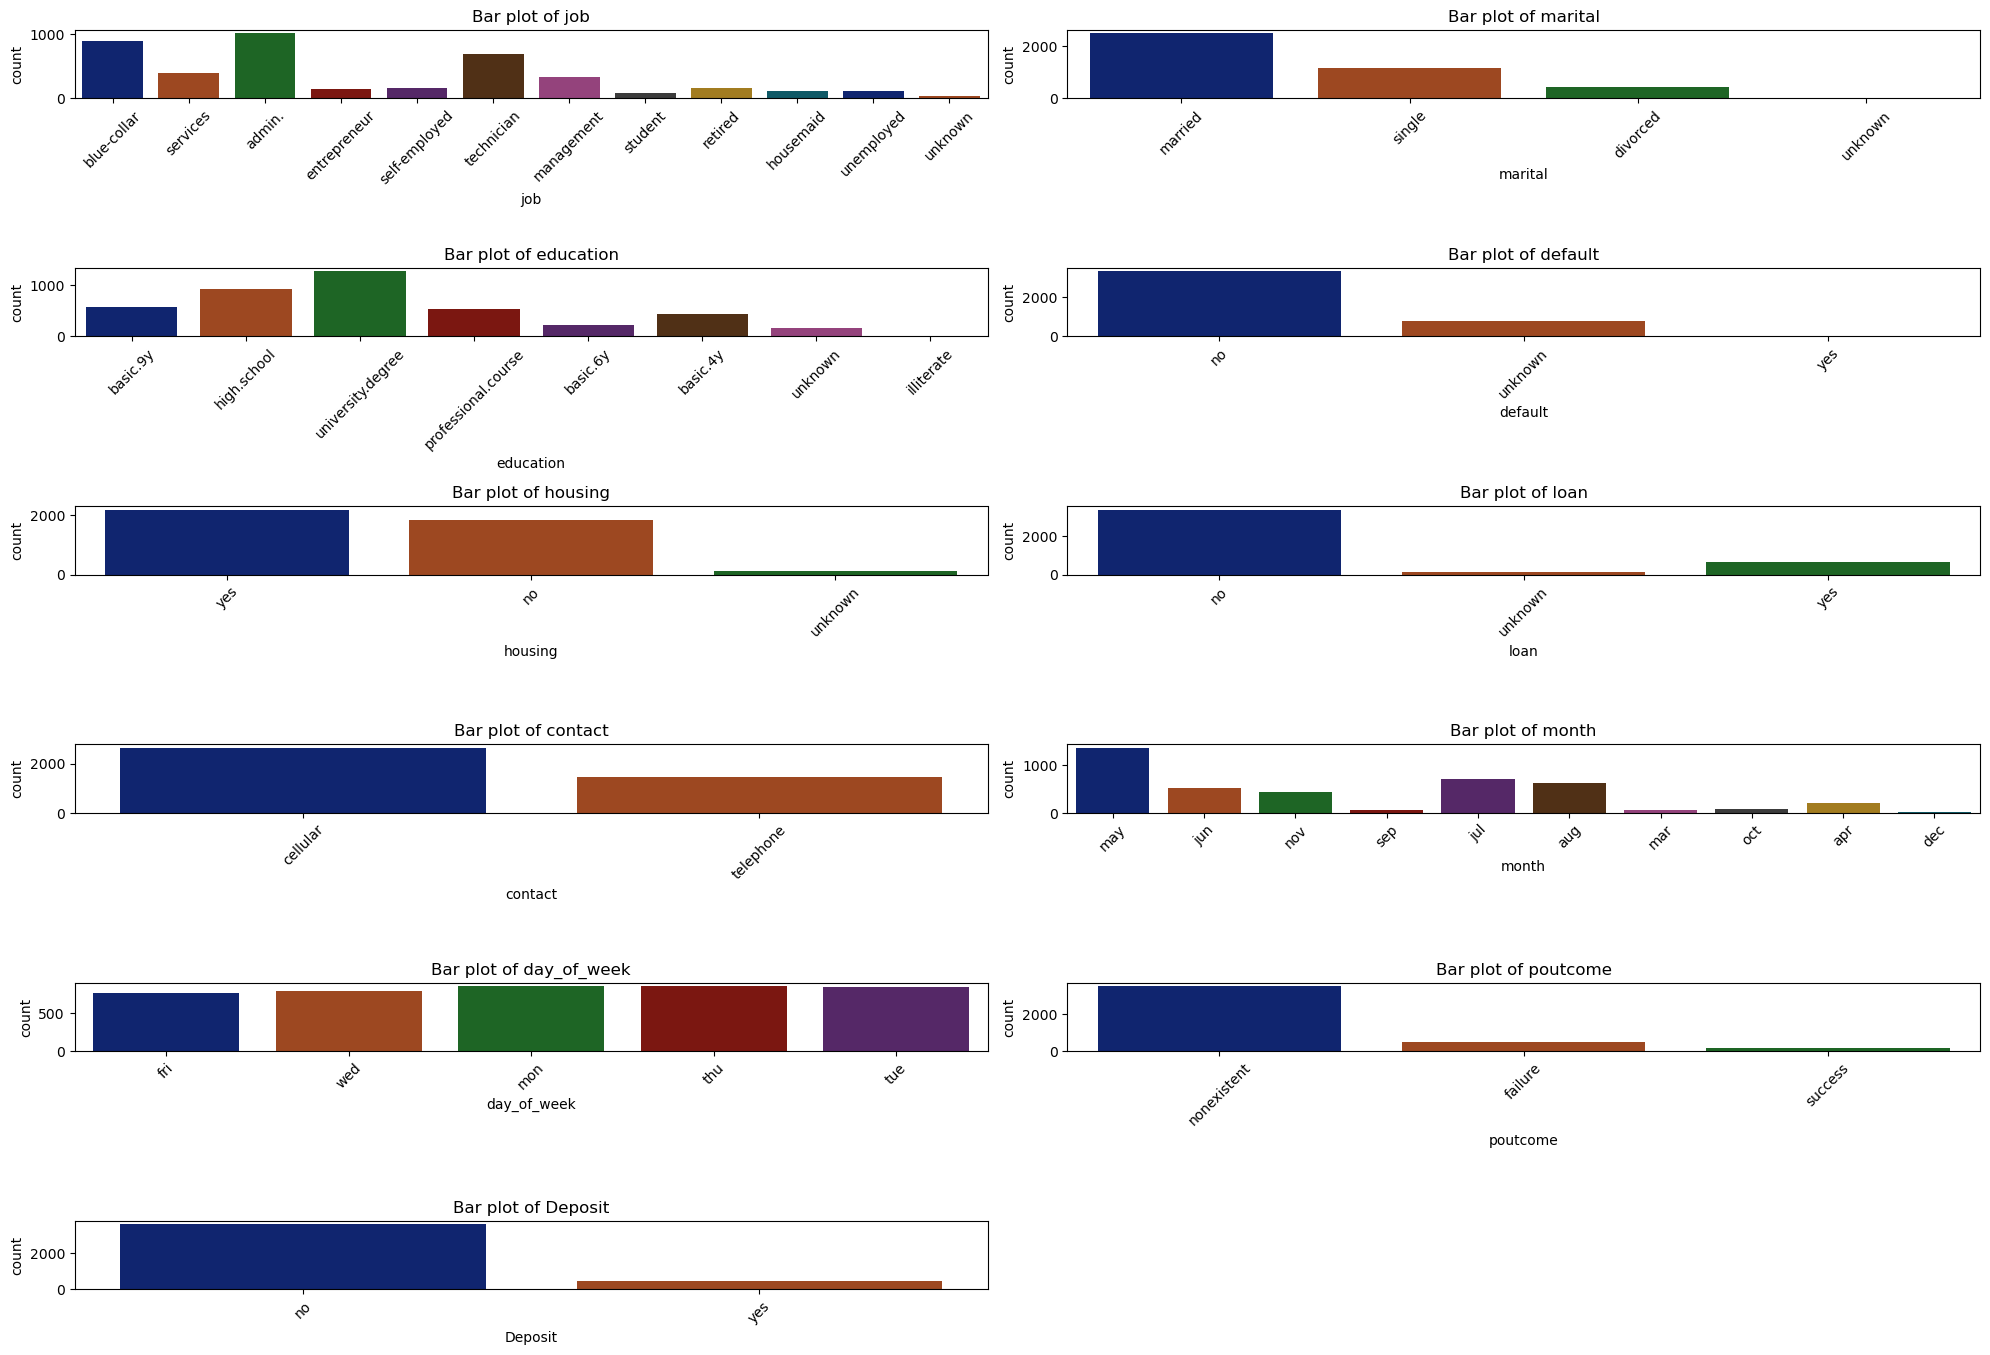

In [19]:
#creating hist plots for every object in the dataset based on its features
num_col=2
num_rows= len(categorical) + 1 // 2 # for odd no. of objects or columns
plt.figure(figsize=(20,25))

for i , col in enumerate(categorical , 1) :#we initiate 1 when as start cause plots are assigned on the basis i^th no.
    plt.subplot(num_rows,num_col , i)
    sns.countplot(x= col , data = df, palette = "dark")
    plt.title(f"Bar plot of {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("count")
    plt.xticks(rotation =45) #rotate the xlabel to 45 degree

plt.tight_layout()
plt.show()

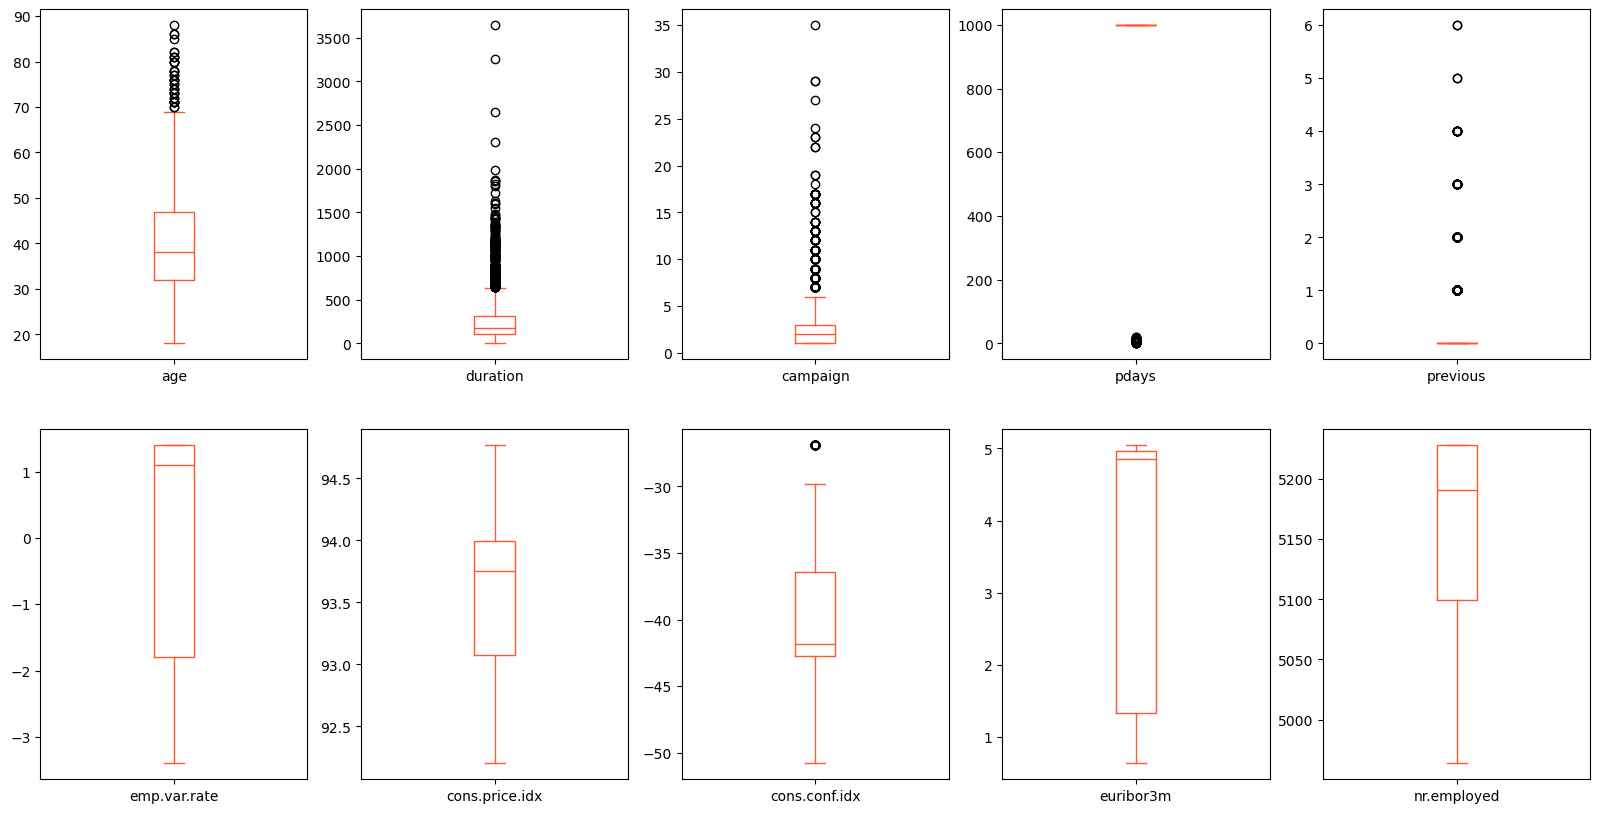

In [20]:
df.plot(kind="box",subplots= True ,layout=(2,5), figsize=(20,10),color ="#FF5733")
plt.show()

In [21]:
column = df[['age','campaign','duration']]
q1 = np.percentile(column, 25)
q3 = np.percentile(column, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df[['age','campaign','duration']] = column[(column > lower_bound) & (column < upper_bound)]

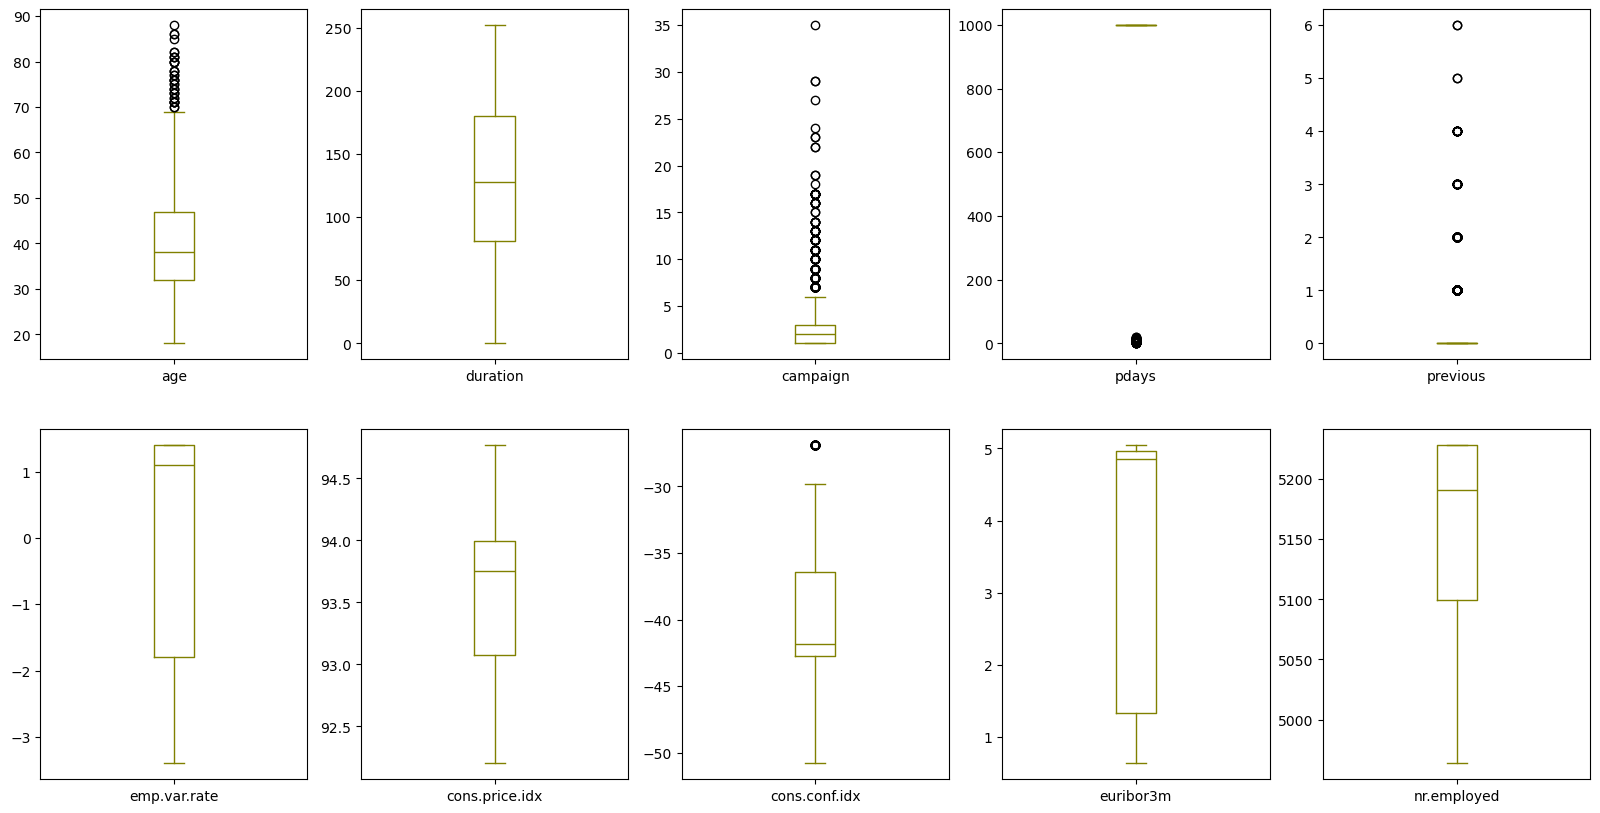

In [22]:
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#808000')
plt.show()

                     age  duration  campaign     pdays  previous  \
age             1.000000  0.014048 -0.014169 -0.043425  0.050931   
duration        0.014048  1.000000 -0.218111 -0.093694  0.094206   
campaign       -0.014169 -0.218111  1.000000  0.058742 -0.091490   
pdays          -0.043425 -0.093694  0.058742  1.000000 -0.587941   
previous        0.050931  0.094206 -0.091490 -0.587941  1.000000   
emp.var.rate   -0.019192 -0.063870  0.176079  0.270684 -0.415238   
cons.price.idx -0.000482 -0.013338  0.145021  0.058472 -0.164922   
cons.conf.idx   0.098135  0.045889  0.007882 -0.092090 -0.051420   
euribor3m      -0.015033 -0.067815  0.159435  0.301478 -0.458851   
nr.employed    -0.041936 -0.097339  0.161037  0.381983 -0.514853   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.019192       -0.000482       0.098135  -0.015033   
duration           -0.063870       -0.013338       0.045889  -0.067815   
campaign            0.176079 

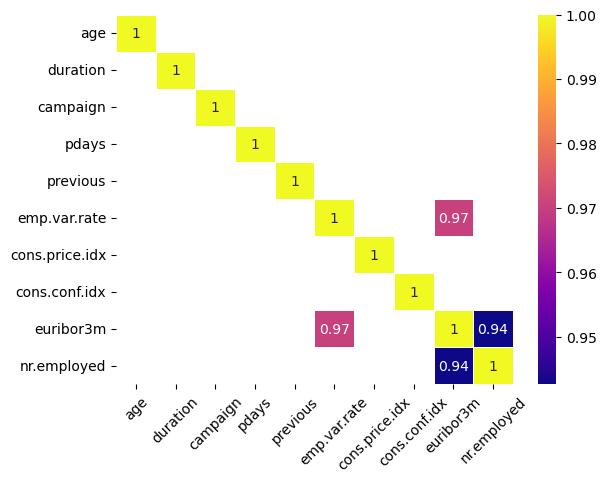

In [23]:
numeric_df = df.drop(columns = categorical) # dropping the object datatype columns

corr = numeric_df.corr() #creating a correlation matrix
print(corr)
corr = corr[abs(corr) >= 0.90]
sns.heatmap(corr , annot = True,cmap ='plasma' ,linewidths=0.5, linecolor='white')
plt.xticks(rotation = 45)
plt.show()


In [24]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']

In [25]:
df1 = df.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'Deposit'],
      dtype='object')

In [26]:
df1.drop(high_corr_cols,inplace=True,axis=1)  # axis=1 indicates columns
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'Deposit'],
      dtype='object')

In [27]:

lb = LabelEncoder() 
df_encoded = df1.apply(lb.fit_transform) #converting categorical values  into numerical values 
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,Deposit
0,12,1,1,2,0,2,0,0,6,0,250,1,20,0,1,8,4,0
1,21,7,2,3,0,0,0,1,6,0,250,3,20,0,1,18,16,0
2,7,7,1,3,0,2,0,1,4,4,224,0,20,0,1,23,8,0
3,20,7,1,2,0,1,1,1,4,0,14,2,20,0,1,23,8,0
4,29,0,1,6,0,2,0,0,7,1,55,0,20,0,1,11,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,12,0,1,1,0,2,2,0,3,2,50,0,20,0,1,17,6,0
4115,21,0,1,3,0,2,0,1,3,0,216,0,20,0,1,17,6,0
4116,9,8,2,3,0,0,0,0,6,1,61,1,20,1,0,8,4,0
4117,40,0,1,3,0,0,0,0,1,0,250,0,20,0,1,13,17,0


In [28]:
df_encoded['Deposit'].value_counts()

Deposit
0    3668
1     451
Name: count, dtype: int64

In [29]:

x = df_encoded.drop('Deposit',axis=1)
y = df_encoded['Deposit']
print(x.shape)
print(y.shape)

(4119, 17)
(4119,)


In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3089, 17)
(1030, 17)
(3089,)
(1030,)


In [31]:

def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)  
    print('Testing Score',test_score)

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [33]:
mscore(dt)

Training Score 0.9177727419876983
Testing Score 0.8922330097087379


In [34]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[1 0 0 ... 0 0 0]


In [35]:
eval_model(y_test,ypred_dt)

Accuracy_Score 0.8922330097087379
Confusion Matrix
 [[899  22]
 [ 89  20]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       921
           1       0.48      0.18      0.26       109

    accuracy                           0.89      1030
   macro avg       0.69      0.58      0.60      1030
weighted avg       0.86      0.89      0.87      1030



In [36]:
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')
['no', 'yes']


In [38]:
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [39]:
mscore(dt1)

Training Score 0.9148591777274199
Testing Score 0.8990291262135922


In [40]:
ypred_dt1 = dt1.predict(x_test)

In [41]:

eval_model(y_test,ypred_dt1)

Accuracy_Score 0.8990291262135922
Confusion Matrix
 [[903  18]
 [ 86  23]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       921
           1       0.56      0.21      0.31       109

    accuracy                           0.90      1030
   macro avg       0.74      0.60      0.63      1030
weighted avg       0.88      0.90      0.88      1030

